                             ********Spark Foundation Internship********


# ----------------------------------------------------------------------------------------

##                      Task2:        *Prediction using Unsupervised  Machine Learning*  
# ---------------------------------------------------------------------------------------- 

### Author: 

     NACHOUR ILHAM,Data science and business analytics intern







**Task Description:**
In this task, given Iris Dataset we have to predict the optimal number of clusters using **elbow method** which means we will calculate **WCSS**,WCSS is the sum of squared distance between each point and the centroid in a cluster.


### Importing all libraries required

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

# Modelling  libraries
from sklearn.cluster import KMeans

# Iris dataset
from sklearn import datasets

# Error Handling Library
import warnings 
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
# load the iris dataset
iris = datasets.load_iris()

# See the first 5 rows
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Showing the first five rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data wrangling

In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Adding target to iris_df
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Let's see how many examples we have of each species
iris_df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### Visualizing the data

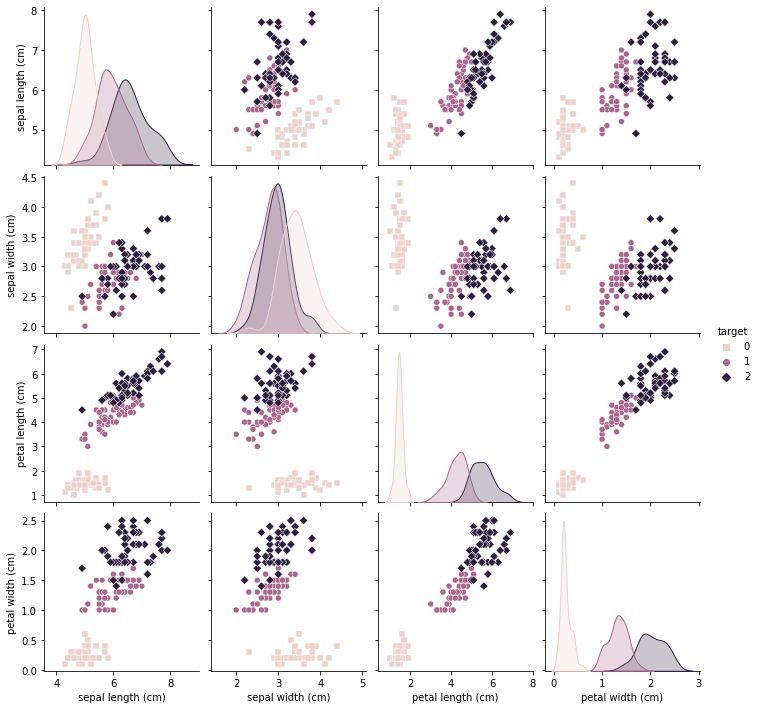

In [10]:
sns.pairplot(iris_df, hue="target",markers=['s','o','D'])

### Finding the optimum number of clusters

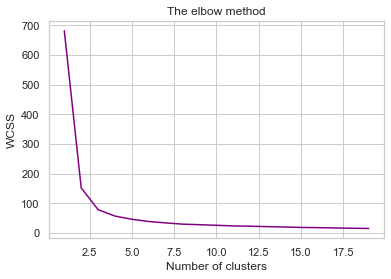

In [11]:
X = iris_df.iloc[:,[0,1,2,3]].values

# List of the cluster numbers
K = range(1, 20) 

# List to store the within cluster sum of squares
WCSS= []

for k in K:
    model=KMeans(n_clusters=k).fit(X)
    WCSS.append(model.inertia_)
    
# Plotting to observe 'The elbow'
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.plot(K,WCSS,c='purple')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Observation:**
As we can see the Inertia start decreasing in a linear way with a value of k equal to 3.
So, with **K=3** we have obtained an optimal inertia with which we can segment the data into **3 different clusters**.

### Fitting and predicting

In [12]:
# from elbow method : the best K cluster is 3
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Visualizing the clusters

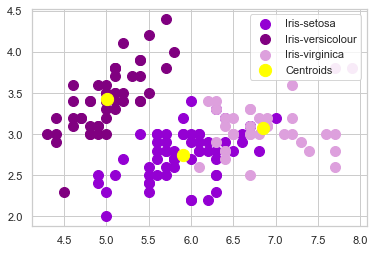

In [13]:
#plot Clusters
plt.scatter(x= X[y_kmeans==0, 0], y= X[y_kmeans==0, 1], c="darkviolet", label='Iris-setosa',s=100)
plt.scatter(x= X[y_kmeans==1, 0], y= X[y_kmeans==1, 1], c="purple", label='Iris-versicolour',s=100)
plt.scatter(x= X[y_kmeans==2, 0], y= X[y_kmeans==2, 1], c="plum", label='Iris-virginica',s=100)
#plot clusters centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids',s=150)
plt.legend()
plt.show()